<center> <h1>[INFO-F305] - Modélisation et Simulation - Projet Octave<br><br>Alexandre HENEFFE - 000440761<br>Ricardo GOMES RODRIGUES - 000443812<br><br>Novembre 2018</h1> </center>


# Introduction
Dans le cadre de ce projet, nous sommes amenés à étudier et analyser l'évolution de systèmes dynamiques modélisant l'évolution des sentiments de deux robots w(t) (WALL-E) et e(t) (EVE). La formule suivante représente l'évolution général de leur sentiments.


$$
    \dot{R} = AR \rightarrow{} \left \{
   \begin{array}{r c l}
      \dot{w}(t)  & = & a_{11}w(t) + a_{12}e(t) \\
      \dot{e}(t)  & = & a_{21}w(t) + a_{22}e(t)
   \end{array}
   \right .
$$


Nous aurons l'occasion d'étudier plusieurs cas de figures de cette formule.

# Typologie des systèmes

## Cas 1


Les sentiments d'EVE ne dépendent pas de WALL-E

$$
    \left \{
   \begin{array}{r c l}
      \dot{w}(t)  & = & aw(t) + be(t) \\
      \dot{e}(t)  & = & 0
   \end{array}
   \right .
$$

$$
\begin{bmatrix}
a & b \\
0 & 0
\end{bmatrix}
$$

#### Valeurs propres
$$ \lambda^2 - a\lambda = 0$$

$$ \lambda_{1,2} = \frac{a \pm \sqrt{a^2}}{2} = \{a, 0\}$$ 

Donc ce sera toujours un système non simple stable/instable.

#### Déterminant

det(A) = 0 : système non simple : infinité de points d'équilibre


## Cas 2


Les deux automates ont la même dynamique

$$
    \left \{
   \begin{array}{r c l}
      \dot{w}(t)  & = & aw(t) + be(t) \\
      \dot{e}(t)  & = & bw(t) + ae(t)
   \end{array}
   \right .
$$

$$
\begin{bmatrix}
a & b \\
b & a
\end{bmatrix}
$$

#### Valeurs propres
$$\lambda^2-2a\lambda + (a^2-b^2) = 0$$

$$ \lambda_{1,2} = \frac{2a \pm \sqrt{4a^2 - 4(-b^2+a^2)}}{2} = a \pm b$$


* Nous aurons toujours des $\lambda_{1,2}$ réels.
* Si a = 0, $\lambda_{1, 2} = \pm b$ et donc un système non simple instable/stable
* Si b = 0, $\lambda_{1,2} $ de signes opposés et donc une selle
* Si a = b, $\lambda_{1}$ et/ou $\lambda_{2}$ = 0 et donc nous aurons un système non simple instable/stable.
* Sinon, il peut prendre les autres types possibles (noeud instable, noeud stable, etc..)


#### Déterminant

Det(A) = $a^2 - b^2$

* Si a = b, le déterminant est égal à 0 et nous avons un système simple avec un point d'équilibre en (0,0)
* Sinon, le déterminant est différent de 0 et nous avons un système non-simple avec plusieurs points d'équilibre.

## Cas 3
Les deux robots ont une dynamique contrastante

$$
    \left \{
   \begin{array}{r c l}
      \dot{w}(t)  & = & aw(t) + be(t) \\
      \dot{e}(t)  & = & -bw(t) + -ae(t)
   \end{array}
   \right .
$$

$$
\begin{bmatrix}
a & b \\
-b & -a
\end{bmatrix}
$$

#### Valeurs propres
$$\lambda^2 + (-a^2+b^2) = 0$$

$$ \lambda_{1,2} = \frac{0 \pm \sqrt{-4(-a^2+b^2}}{2} = \pm \sqrt{-a^2-b^2}$$

* Si $|b| > |a|$, on a des racines complexes dont le $\alpha = 0$ et donc nous aurons toujours un centre.
* Si $|a| == |b|$, alors nous avons $\lambda_{1,2} = 0$ et nous aurons un système non simple instable.
* Sinon, $|b| < |a|$ et nous aurons $\lambda_{1,2} \in \mathbb{R}$ et le système peut être un des autres types possibles (noeud instable, ...).


#### Déterminant

det(A) = $-a^2 + b^2$

* Si a == b, det(A) = 0 et donc ce sera un système simple et nous aurons un point d'équilibre en (0,0)
* Sinon, det(A) sera différent de 0 et on aura un système non-simple ainsi que plusieurs points d'équilibre.




## Cas 4

La dynamique de chaque robot dépend simplement du robot-même

$$
    \left \{
   \begin{array}{r c l}
      \dot{w}(t)  & = & ae(t) \\
      \dot{e}(t)  & = & bw(t)
   \end{array}
   \right .
$$

$$
\begin{bmatrix}
0 & a \\
b & 0
\end{bmatrix}
$$

#### Valeurs propres
$$\lambda^2 - ab = 0$$

$$ \lambda_{1,2} = \frac{0 \pm \sqrt{-4(-ab)}}{2} = \pm \sqrt{ab} $$ 


* Si a = 0 ou b = 0: $\lambda_{1,2} = 0$ \\
* Si a et b sont de signes opposés : $\lambda_{1,2}$ = complexes conjugués et du coup soit un centre, soit un foyer stable, soit un foyer instable\\
* Si a et b sont de signes égaux : $\lambda_{1}$ et $\lambda_{2}$ de signes opposés et du coup une selle.



#### Déterminant

Det(A) = -ab

* Si a = 0 ou b = 0, Det(A) = 0 et nous avons un système simple et un seul point d'équilibre (0,0)
* Sinon, nous avons un système non simple et plusieurs points d'équilibre.

# Droites invariantes, isoclines, portraits de phase
Après avoir analysé paramétriquement les différents systèmes, nous calculons les droites invariantes et isoclines résultantes que nous synthétisons dans un portrait de phase.

## Systèmes

$$
    \dot{R} = AR \rightarrow{} \left \{
   \begin{array}{r c l}
      \dot{w}(t)  & = & a_{11}w(t) + a_{12}e(t) \\
      \dot{e}(t)  & = & a_{21}w(t) + a_{22}e(t)
   \end{array}
   \right .
$$

Ci-dessous, nous avons la représentation du système dynamique d'ordre 2 général. Nous pouvons choisir les conditions initiales associées.

In [19]:
warning('off','all');
# 1. Représentation du système dynamique d'ordre 2.
function [t,x] = system_simulation(A, init)
    ode_sys = @(t,x) [A(1,1)*x(1)+A(1,2)*x(2);A(2,1)*x(1)+A(2,2)*x(2)]; # Définition du système
    [t,x] = ode23 (ode_sys, [0, 10], init); # Résolution du système
endfunction

## Droites invariantes

$$
\left (
\begin{bmatrix}
a_{1,1} & a_{1,2} \\
a_{2,1} & a_{2,2}
\end{bmatrix}
+
\begin{bmatrix}
\lambda_{1} & 0\\
0 & \lambda_{2}
\end{bmatrix}
\right )
x
\begin{bmatrix}
x \\
y
\end{bmatrix}
= 0
$$

$$
   \left \{
   \begin{array}{r c l}
      (a_{1,1}+\lambda_{1})x + (a_{1,2}+0)y = 0\\
      (a_{2,1}+0)x + (a_{2,2}+\lambda_{2})y = 0
   \end{array}
   \right .
$$

$$v_{1} = \frac{V_{2,1}}{V_{1,1}} $$ 
$$v_{2} = \frac{V_{2,2}}{V_{1,2}} $$

#### Cas 1
$$
   \left \{
   \begin{array}{r c l}
      (a+\lambda_{1})x + by = 0\\
      \lambda_{2}y = 0
   \end{array}
   \right .
$$
#### Cas 2
$$
   \left \{
   \begin{array}{r c l}
      (a+\lambda_{1})x + by = 0\\
      bx + (a+\lambda_{2})y = 0
   \end{array}
   \right .
$$
#### Cas 3
$$
   \left \{
   \begin{array}{r c l}
      (a+\lambda_{1})x + by = 0\\
      -bx + (-a+\lambda_{2})y = 0
   \end{array}
   \right .
$$
#### Cas 4
$$
   \left \{
   \begin{array}{r c l}
      \lambda_{1}x + ay = 0\\
      bx + \lambda_{2}y = 0
   \end{array}
   \right .
$$

Bien entendu, si $V_{2,1} = 0$ ou $V_{2,2} = 0$, nous aurons des vecteurs propres en 0. \\

Ci-dessous, nous avons les calculs des droites invariantes: vecteurs propres et leurs trajectoires associées.

In [20]:
# 2. Dessiner les droites correspondants aux vecteurs propres et le sense des trajectoires associés
function [eigenline_1,eigenline_2,V] = compute_eigenlines(A,line_range)
    [V,L] = eig(A);
    eigenline_1 = (V(2,1)/V(1,1)) * line_range;
    eigenline_2 = (V(2,2)/V(1,2)) * line_range;
endfunction

## Isoclines
Ci-dessous, nous avons les calculs des isoclines.

$$
    \left \{
   \begin{array}{r c l}
      \dot{w}(t)  & = & a_{11}w(t) + a_{12}e(t) = 0\\
      \dot{e}(t)  & = & a_{21}w(t) + a_{22}e(t) = 0
   \end{array}
   \right .
$$

$$
\left \{
\begin{array}{r c l}
    e(t) = \frac{-a_{1,1}w(t)}{a_{1,2}}\\
    e(t) = \frac{-a_{2,1}w(t)}{a_{2,2}}
\end{array}
\right .
$$

#### Cas 1 : 

$
\begin{bmatrix}
a & b \\
0 & 0
\end{bmatrix}
$

On obtient 

$e(t) = \frac{-a*w(t)}{b}$ et $e(t) = \frac{-0*w(t)}{0}$

#### Cas 2 :

$
\begin{bmatrix}
a & b \\
b & a
\end{bmatrix}
$

On obtient 

$e(t) = \frac{-a*w(t)}{b}$ et $e(t) = \frac{-b*w(t)}{a}$ 

La valeur absolue des coefficiants de la pente de ces isoclines sont égaux.

#### Cas 3 :

$
\begin{bmatrix}
a & b \\
-b & -a
\end{bmatrix}
$

On obtient 

$e(t) = \frac{-a*w(t)}{b} = \frac{-a*w(t)}{b}$ et $e(t) = \frac{b*w(t)}{-a} = \frac{-b*w(t)}{a}$ 

La valeur absolue des coefficiants de la pente de ces isoclines sont égaux.


#### Cas 4 :

$
\begin{bmatrix}
0 & a \\
b & 0
\end{bmatrix}
$

On obtient 

$e(t) = \frac{-0*w(t)}{a} = 0 et $e(t) = \frac{-b*w(t)}{0} $ d

Dans tous les cas, 
- Si le numérateur est nul et que le dénominateur est non-nul, nous n'aurons pas de droite isocline.

- Si un dénominateur est nul, la droite isocline sera une droite confondue à l'axe des abscisses.


In [21]:
# 3. Calculer les isoclines
function [isocline_1,isocline_2] = compute_isoclines(A,line_range)
    isocline_1 = -(A(1,1)/A(1,2)) * line_range;
    isocline_2 = -(A(2,1)/A(2,2)) * line_range;
endfunction

## Portrait de phase
Ci-dessous, nous avons le portrait de phase complet qui contient les droites invariantes, les isoclines et le portrait de phase.

In [22]:
# 4. Portrait de phase complet
function [x1,x2,x1p,x2p] = plot_portrait_phase_complete(A)
    #grid for plotting
    x1range=-1.5:.1:1.5;
    x2range=-1.5:.1:1.5;
    [x1,x2] = meshgrid(x1range, x2range);

    # Define the system to plot (based on matrix A)
    x1p = A(1,1)*x1+A(1,2)*x2;
    x2p = A(2,1)*x1+A(2,2)*x2;

    #Normalize values for plotting
    norms=sqrt(x1p.^2+x2p.^2);
    
    figure(2)
    [eigenline_1,eigenline_2,V] = compute_eigenlines(A,x1range);
    [isocline_1,isocline_2] = compute_isoclines(A,x1range);
    
    # Vector field plot
    hold on;
    quiver(x1,x2,x1p./norms,x2p./norms,0.5);
    # Isoclines
    plot(x1range,isocline_1,"linewidth",5);
    plot(x1range,isocline_2,"linewidth",5);
    # Vecteurs propres
    plot(x1range,eigenline_1,"linewidth",5);
    plot(x1range,eigenline_2,"linewidth",5);
    quiver([0;0],[0;0],V(1,:),V(2,:),"linewidth",10,"color","k");
    legend("field","v_1","v_2","isocline_1","isocline_2","location","south","orientation", "horizontal");
    
endfunction

# Exemples
Afin de résumer nos différents exemples, nous avons créé un tableau récapitulant toutes nos données c'est-à-dire :
* le couple (a, b)
* les valeurs propres
* le système (non-)simple
* points d'équilibre
* stabilité 

pour chaque cas/type.

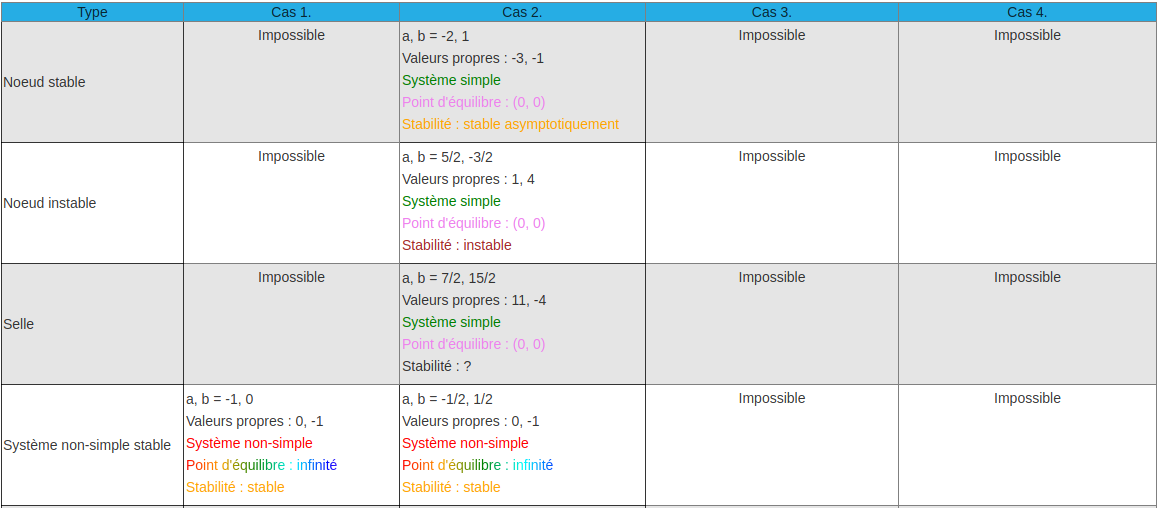
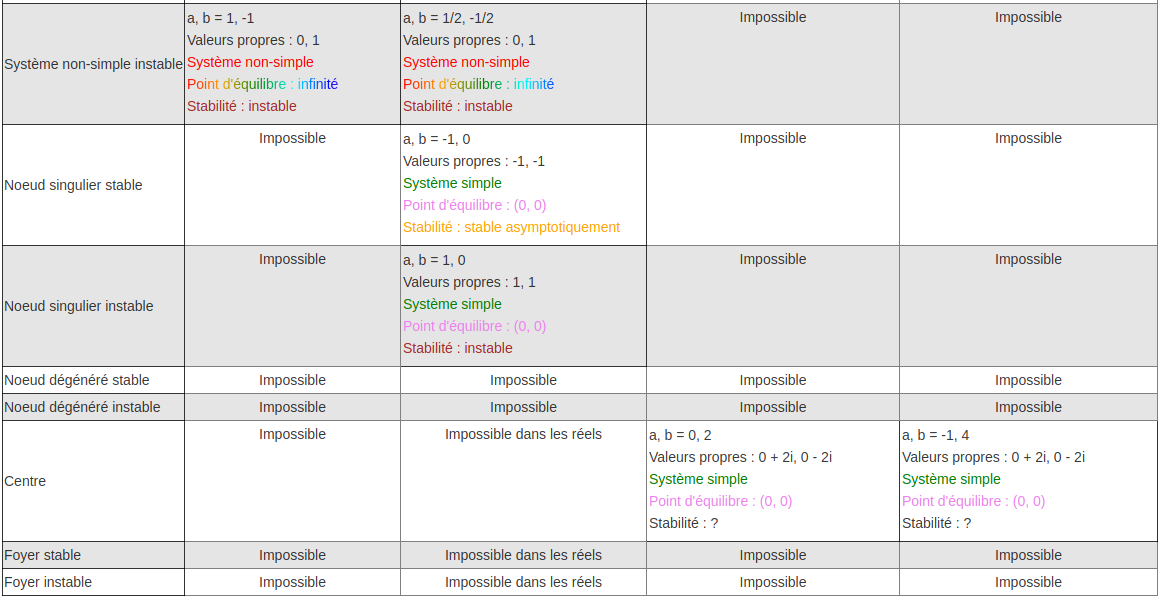

Afin d'avoir tous les différents types de système, nous avons trouvé un couple (a, b) pour chacun de ces types.

## Exemples concrets

#### Equation 2 - Noeud stable

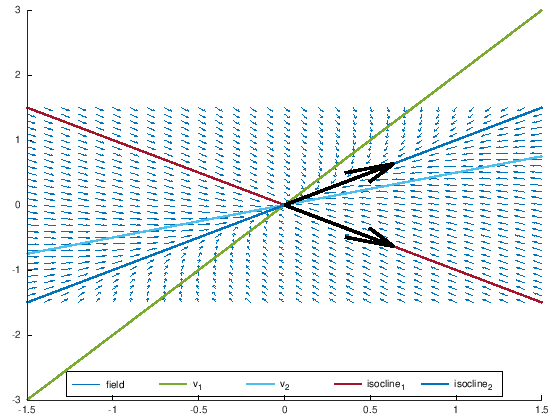

In [23]:
plot_portrait_phase_complete([-2 1;1 -2]); %(-2, 1) cas 2, nous avons un noeud stable

#### Equation 2 - Noeud instable

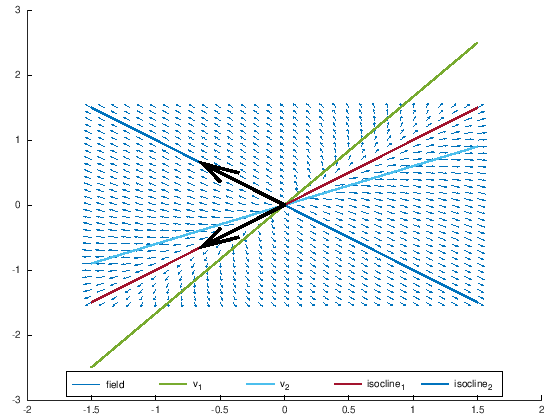

In [24]:
plot_portrait_phase_complete([5/2 -3/2; -3/2 5/2]); %(5/2, -3/2) cas 2, nous avons un noeud instable

#### Equation 2 - Selle

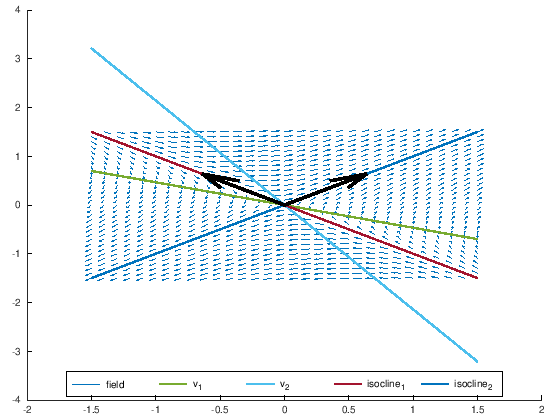

In [25]:
plot_portrait_phase_complete([7/2 15/2; 15/2 7/2]); %(7/2, 15/2) cas 2, nous avons une selle

#### Equation 1 - Système non simple stable
Nous constatons que les trajectoires des vecteurs vitesse sont toutes parallèles à l'isocline 1 et les droites invariantes sont confondues dans les axes.

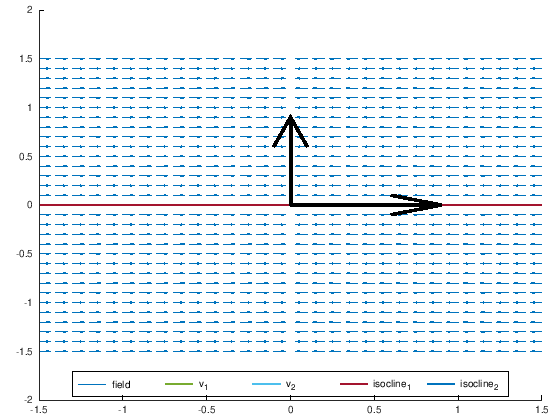

In [26]:
plot_portrait_phase_complete([-1 0; 0 0]); %(-1, 0) cas 1, nous avons un système non-simple stable

#### Equation 1 - Système non simple instable
Nous constatons que les trajectoires des vecteurs vitesses sont toutes parallèles à l'isocline 1 et que l'isocline 2 sépare les 2 quadrants de sens opposés.

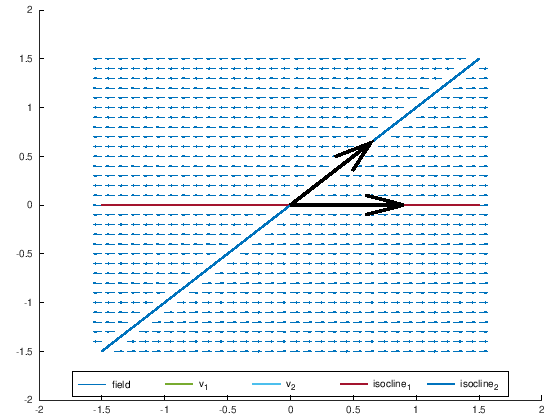

In [27]:
plot_portrait_phase_complete([1 -1; 0 0]); %(1, -1) cas 1, nous avons un système non-simple instable

#### Equation 2 - Noeud singulier stable

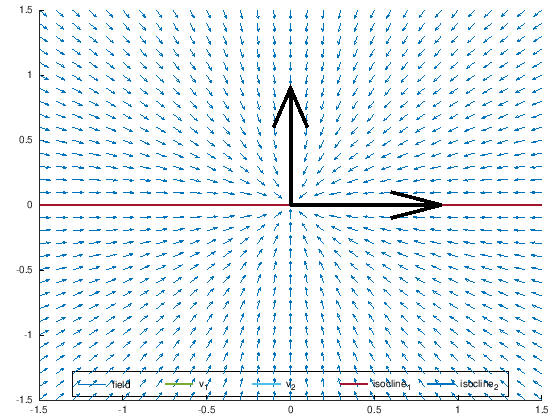

In [28]:
plot_portrait_phase_complete([-1 0; 0 -1]); %(-1, 0) cas 2, nous avons un noeud singulier stable

#### Equation 2 - Noeud singulier instable

Nous constatons qu'il n'y a pas

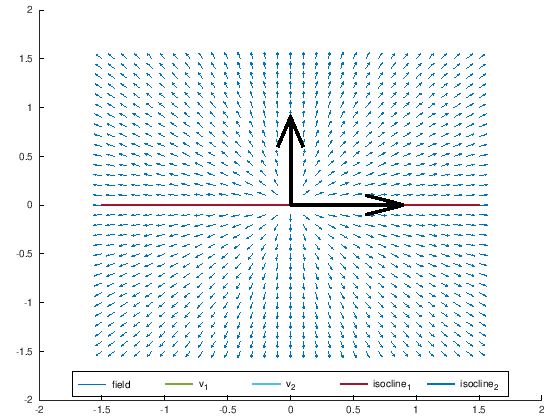

In [29]:
plot_portrait_phase_complete([1 0; 0 1]); %(1, 0) cas 2, nous avons un noeud singulier instable

#### Equation 3 - Centre

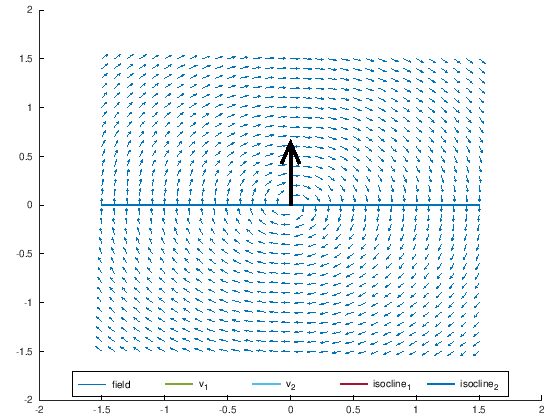

In [30]:
plot_portrait_phase_complete([0 2; -2 0]); %(0, 2) cas 3, nous avons un centre

#### Equation 4 - Centre

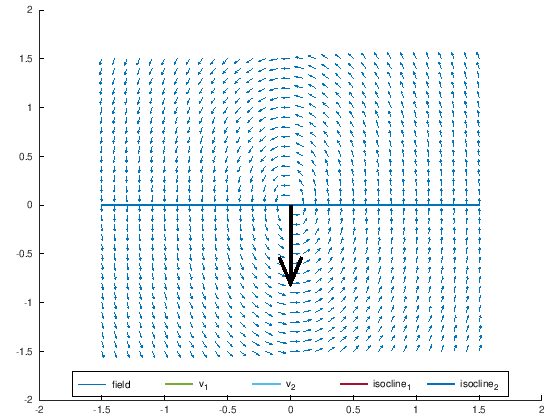

In [31]:
plot_portrait_phase_complete([0 -1; 4 0]); %(-1, 4) cas 4, nous avons un centre

# Évolution des systèmes dans le temps

La solution générale du système est: 
$\mathbf{X}(t) = C_1 \mathbf{X}^{(1)}(t) + C_2 \mathbf{X}^{(2)}(t) $

- Si nous avons des valeurs propres réelles et distinctes, $\mathbf{X}^{(1)}(t) = e^{\lambda_1 t} \mathbf{v_1} $ et $\mathbf{X}^{(2)}(t) = e^{\lambda_2 t} \mathbf{v_2} $

- Si nous avons des valeurs propres réelles et multiples, $\mathbf{X}^{(1)}(t) = e^{\lambda t} \mathbf{v_1} $ et
$\mathbf{X}^{(2)}(t) = e^{\lambda t} (\mathbf{v_2} + t\mathbf{v_1}) $

- Si nous avons des valeurs propres complexes et conjuguées, $\mathbf{X}^{(1)}(t) = e^{\alpha t} (\cos(\beta t)\mathbf{u} - \sin(\beta t)\mathbf{v} ) $ et $\mathbf{X}^{(2)}(t) = e^{\alpha t} (\sin(\beta t)\mathbf{u} + \cos(\beta t)\mathbf{v}) $

### Cas 1

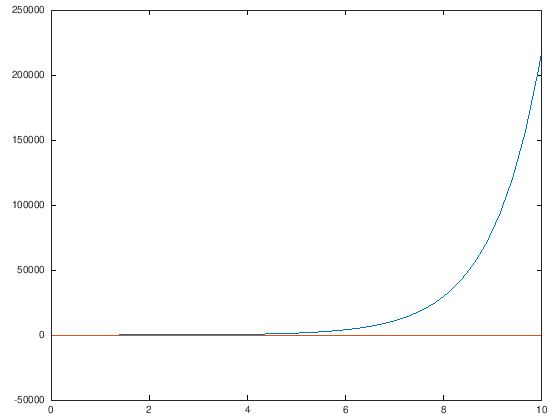

In [32]:
%[t,x] = system_simulation([1 -4; 0 0], [0, 4]);
[t1,x1] = system_simulation([1 3; 0 0], [-5, 5]);
[t2,x2] = system_simulation([1 3; 0 0], [5, 5]);
[t3,x3] = system_simulation([1 3; 0 0], [-5, 5]);
[t4,x4] = system_simulation([1 3; 0 0], [-5, 5]);
[t5,x5] = system_simulation([1 3; 0 0], [-5, 5]);
hold on;
plot(t1,x1)
plot(t2,x2)
plot(t3,x3)
plot(t4,x4)
plot(t5,x5)

### Cas 2

### Cas 3

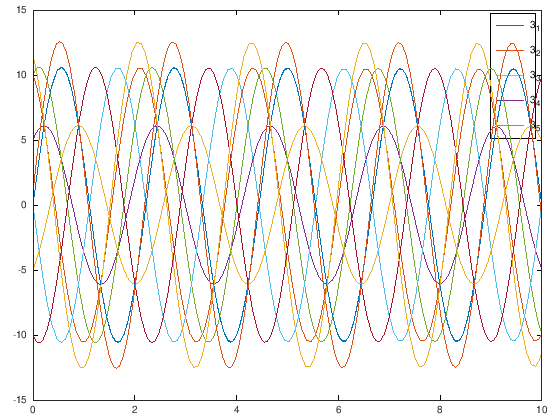

In [51]:
[t3_1, x3_1] = system_simulation([1 3; -3 -1], [0, 10]);
plot(t3_1, x3_1)
hold on
[t3_2, x3_2] = system_simulation([1 3; -3 -1], [-5, 5]);
plot(t3_2, x3_2)
[t3_3, x3_3] = system_simulation([1 3; -3 -1], [10, 0]);
plot(t3_3, x3_3)
[t3_4, x3_4] = system_simulation([1 3; -3 -1], [-10, 0]);
plot(t3_4, x3_4)
[t3_5, x3_5] = system_simulation([1 3; -3 -1], [1, 11.5]);
plot(t3_5, x3_5)
legend("3_1", "3_2", "3_3", "3_4", "3_5")

Nous pouvons remarquer que nous avons tout le temps des fonctions sinus/cosinus. Ceci est normal étant donné que nous manipulons des complexes.

### Cas 4

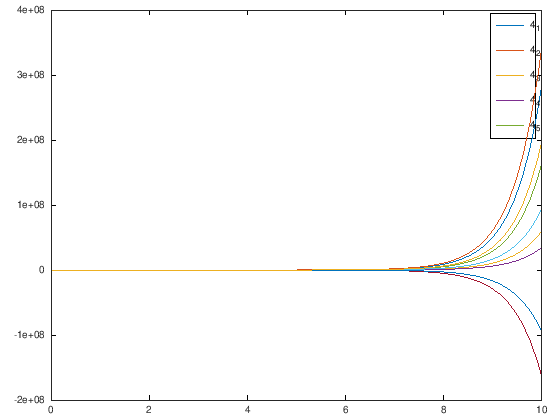

In [53]:
[t4_1, x4_1] = system_simulation([0 3; 1 0], [0, 10]);
plot(t4_1, x4_1)
[t4_2, x4_2] = system_simulation([0 3; 1 0], [-5, 5]);
plot(t4_2, x4_2)
[t4_3, x4_3] = system_simulation([0 3; 1 0], [10, 0]);
plot(t4_3, x4_3)
[t4_4, x4_4] = system_simulation([0 3; 1 0], [-10, 0]);
plot(t4_4, x4_4)
[t4_5, x4_5] = system_simulation([0 3; 1 0], [1, 11.5]);
plot(t4_5, x4_5)
legend("4_1", "4_2", "4_3", "4_4", "4_5")

Dans ce cas-ci, nous avons des exponentielles positives ou négatives en fonction de l'intervalle que nous avons choisi.

# Conclusion
Nous constatons que selon la configuration des systèmes dynamiques, nous n'avons pas tous les types possibles (exemple : pas de noeud stable pour les cas 1, 3 et 4). Cela s'explique par le fait que les valeurs propres liées à ces types ne peuvent pas être obtenues avec les matrices liées à ces équations. 
* Cas 1: Comme $\lambda_{1} = a$ et $\lambda_{2} = 0$, nous avons que des systèmes non simple stable/instable
* Cas 2: Comme $ \lambda_{1,2} = \frac{2a \pm \sqrt{4a^2 - 4(-b^2+a^2)}}{2} = a \pm b$, nous n'auront jamais de 
    * noeud dégénéré stable/instable car nous ne pouvons pas avoir de matrice non diagonalisable donnant des valeurs propres identiques
    * de centre car nous ne pouvons pas avoir de matrice donnant des valeurs propres complexes et conjuguées dont $\alpha = 0$
    * de foyer stable/instable car nous ne pouvons pas avoir de matrice donnant des valeurs propres complexes et conjuguées dont $\alpha < 0$ ou $\alpha > 0$. 
* Cas 3: Comme $ \lambda_{1,2} = \frac{0 \pm \sqrt{-4(-a^2+b^2)}}{2} = \pm \sqrt{-a^2-b^2}$, nous avons seulement des centres car nous pour avons des matrices générant des valeurs propres complexes et conjugués avec $\alpha = 0$
* Cas 4: Comme $ \lambda_{1,2} = \frac{0 \pm \sqrt{-4(-ab)}}{2} = \pm \sqrt{ab} $, nous avons seulement des centres pour les mêmes raisons que pour le cas 3